# Thermal Impedance to SPICE-model
## How to read data sheet
The example MOSFET used is Nexperia PSMN3R4-30BLE
![alt text](Example_Transistor_Thermal_Impedance.png "Title")


## import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## The serie of thermal impedance exponentials

In [2]:
def model_function(t, Ri, Ti):
    return np.multiply(Ri, (1-np.exp(np.multiply(t*-1,Ti))))

def model_series(t, R1, T1, R2, T2, R3, T3, R4, T4, R5, T5, R6, T6):
    return  model_function(t, R1, T1) + model_function(t, R2, T2) + model_function(t, R3, T3) + model_function(t, R4, T4) + model_function(t, R5, T5) + model_function(t, R6, T6)

## Input data here like the blue dots in the graph above

In [3]:
# look up deephaven input_table: https://deephaven.io/core/docs/how-to-guides/input-tables/
x_data = [1e-6 ,5e-6 ,1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0]
y_data = [4e-03 , 1.5e-2, 2e-2 , 4.5e-2 , 7e-2 , 1.5e-1 , 2.33e-1 , 5e-1 , 6e-1 , 8e-1 , 8e-1 , 8e-1 , 8e-1]

print("This is your x data")
print(x_data)
print("this is your y data")
print(y_data)

This is your x data
[1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
this is your y data
[0.004, 0.015, 0.02, 0.045, 0.07, 0.15, 0.233, 0.5, 0.6, 0.8, 0.8, 0.8, 0.8]


## Thermal resistance junction to ambient

In [4]:
Rth = 50

## Set the axes of your plot to the same as the plot in the datasheet
In the graph above its xlim 

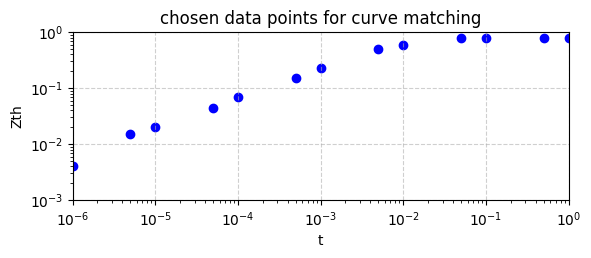

In [5]:
graph_scale_base = 10

time_scale_lowest_exponent = -6
time_scale_highest_exponent = 0

thermal_impedance_lowest_exponent = -3
thermal_impedance_highest_exponent = 0

t_lower_limit = graph_scale_base**time_scale_lowest_exponent
t_upper_limit = graph_scale_base**time_scale_highest_exponent
z_lower_limit = graph_scale_base**thermal_impedance_lowest_exponent
z_upper_limit = graph_scale_base**thermal_impedance_highest_exponent

# expand the amount of points in time(logarithmically spaced) for more elaborate graphs
x_data_expanded = np.logspace(time_scale_lowest_exponent, time_scale_highest_exponent, num=1000, base=graph_scale_base)

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('chosen data points for curve matching')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

## Make an initial guess for the parameters resistance Ri and timeconstant Ti

In [6]:
initial_guess = [ 0.0026 , 10000000\
                 ,0.0076 , 1000000\
                 ,0.0218 , 100000\
                 ,0.0629 , 10000\
                 ,0.1815 , 1000\
                 ,0.5236 , 100]

## Plot the initial guesses

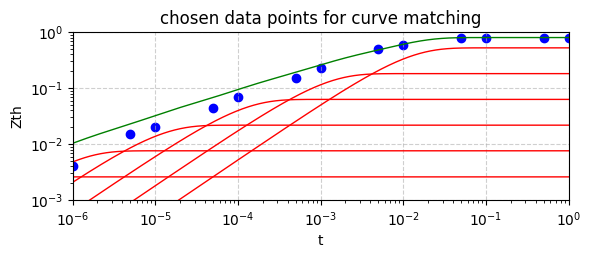

In [7]:
y_data_initial = np.empty_like(x_data_expanded)
y_data_initial_1 = np.empty_like(x_data_expanded)
y_data_initial_2 = np.empty_like(x_data_expanded)
y_data_initial_3 = np.empty_like(x_data_expanded)
y_data_initial_4 = np.empty_like(x_data_expanded)
y_data_initial_5 = np.empty_like(x_data_expanded)
y_data_initial_6 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial[i] = model_series(x_data_expanded[i]\
                                     ,initial_guess[0], initial_guess[1]\
                                     ,initial_guess[2], initial_guess[3]\
                                     ,initial_guess[4], initial_guess[5]\
                                     ,initial_guess[6], initial_guess[7]\
                                     ,initial_guess[8], initial_guess[9]\
                                     ,initial_guess[10],initial_guess[11])
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[0], initial_guess[1])

    y_data_initial_2[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[2], initial_guess[3])

    y_data_initial_3[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[4], initial_guess[5])

    y_data_initial_4[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[6], initial_guess[7])
    
    y_data_initial_5[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[8], initial_guess[9])
    
    y_data_initial_6[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[10], initial_guess[11])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial, label='Data', color='green', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_2, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_3, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_4, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_5, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_6, label='Data', color='red', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('chosen data points for curve matching')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)


## Run curve fit

/tmp/ipykernel_60/4051863435.py:2: RuntimeWarning: overflow encountered in exp
  return np.multiply(Ri, (1-np.exp(np.multiply(t*-1,Ti))))


Initial guess:        R1 = 0.0026,                T1 = 10000000
Optimized parameters: R1 = 0.004351231545853858, T1 = 439710.70078033133
Initial guess:        R2 = 0.0076,                T2 = 1000000
Optimized parameters: R2 = 0.005718527776585491, T2 = 439499.8740569865
Initial guess:        R3 = 0.0218,                T3 = 100000
Optimized parameters: R3 = 0.03644232228436608, T3 = 23584.348317421965
Initial guess:        R4 = 0.0629,                T4 = 10000
Optimized parameters: R4 = 0.09134693186987394, T4 = 640.9640734433242
Initial guess:        R5 = 0.1815,                T5 = 1000
Optimized parameters: R5 = 0.2347943399827901, T5 = 640.9628076927906
Initial guess:        R6 = 0.5236,               T6 = 100
Optimized parameters: R6 = 0.42933960024435197, T6 = 77.4025675225686


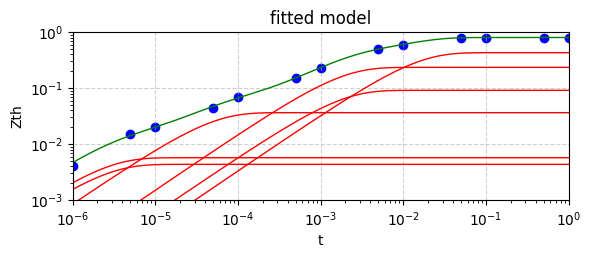

In [8]:
# Step 4: Use curve_fit to fit the model to the data
params, params_covariance = curve_fit(model_series, x_data, y_data, p0=initial_guess, method='lm')

# Step 5: Extract and print the optimized parameters
R1_opt, T1_opt, R2_opt, T2_opt, R3_opt, T3_opt, R4_opt, T4_opt, R5_opt, T5_opt, R6_opt, T6_opt = params
print(f"Initial guess:        R1 = {initial_guess[0]},                T1 = {initial_guess[1]}")
print(f"Optimized parameters: R1 = {R1_opt}, T1 = {T1_opt}")
print(f"Initial guess:        R2 = {initial_guess[2]},                T2 = {initial_guess[3]}")
print(f"Optimized parameters: R2 = {R2_opt}, T2 = {T2_opt}")
print(f"Initial guess:        R3 = {initial_guess[4]},                T3 = {initial_guess[5]}")
print(f"Optimized parameters: R3 = {R3_opt}, T3 = {T3_opt}")
print(f"Initial guess:        R4 = {initial_guess[6]},                T4 = {initial_guess[7]}")
print(f"Optimized parameters: R4 = {R4_opt}, T4 = {T4_opt}")
print(f"Initial guess:        R5 = {initial_guess[8]},                T5 = {initial_guess[9]}")
print(f"Optimized parameters: R5 = {R5_opt}, T5 = {T5_opt}")
print(f"Initial guess:        R6 = {initial_guess[10]},               T6 = {initial_guess[11]}")
print(f"Optimized parameters: R6 = {R6_opt}, T6 = {T6_opt}")

y_data_fitted = np.empty_like(x_data_expanded)
y_data_fitted_1 = np.empty_like(x_data_expanded)
y_data_fitted_2 = np.empty_like(x_data_expanded)
y_data_fitted_3 = np.empty_like(x_data_expanded)
y_data_fitted_4 = np.empty_like(x_data_expanded)
y_data_fitted_5 = np.empty_like(x_data_expanded)
y_data_fitted_6 = np.empty_like(x_data_expanded)

# Plot the data and the fitted curve
for i in range(len(x_data_expanded)):
    y_data_fitted[i] = model_series(x_data_expanded[i]\
                                     ,R1_opt, T1_opt\
                                     ,R2_opt, T2_opt\
                                     ,R3_opt, T3_opt\
                                     ,R4_opt, T4_opt\
                                     ,R5_opt, T5_opt\
                                     ,R6_opt, T6_opt)

    y_data_fitted_1[i] = model_function(x_data_expanded[i]\
                                         ,R1_opt, T1_opt)

    y_data_fitted_2[i] = model_function(x_data_expanded[i]\
                                         ,R2_opt, T2_opt)
    
    y_data_fitted_3[i] = model_function(x_data_expanded[i]\
                                         ,R3_opt, T3_opt)
    
    y_data_fitted_4[i] = model_function(x_data_expanded[i]\
                                         ,R4_opt, T4_opt)
    
    y_data_fitted_5[i] = model_function(x_data_expanded[i]\
                                         ,R5_opt, T5_opt)
    
    y_data_fitted_6[i] = model_function(x_data_expanded[i]\
                                         ,R6_opt, T6_opt)

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_fitted, label='Data', color='green', lw=1)
line = ax.plot(x_data_expanded, y_data_fitted_1, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_fitted_2, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_fitted_3, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_fitted_4, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_fitted_5, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_fitted_6, label='Data', color='red', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('fitted model')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

## the components in the foster tank is therefore
since:
$$ C_i = \frac{\tau_i}{R_i} $$
and we specified:
$$ \tau_i = \frac{1}{T_i} $$
then:
$$ C_i = \frac{1}{T_i R_i} $$

In [9]:
C1_opt = 1 / (np.multiply(R1_opt, T1_opt))
print(f"Optimized parameters: R1 = {R1_opt}, C1 = {C1_opt}")

C2_opt = 1 / (np.multiply(R2_opt, T2_opt))
print(f"Optimized parameters: R2 = {R2_opt}, C2 = {C2_opt}")

C3_opt = 1 / (np.multiply(R3_opt, T3_opt))
print(f"Optimized parameters: R3 = {R3_opt}, C3 = {C3_opt}")

C4_opt = 1 / (np.multiply(R4_opt, T4_opt))
print(f"Optimized parameters: R4 = {R4_opt}, C4 = {C4_opt}")

C5_opt = 1 / (np.multiply(R5_opt, T5_opt))
print(f"Optimized parameters: R5 = {R5_opt}, C5 = {C5_opt}")

C6_opt = 1 / (np.multiply(R6_opt, T6_opt))
print(f"Optimized parameters: R6 = {R6_opt}, C6 = {C6_opt}")

Optimized parameters: R1 = 0.004351231545853858, C1 = 0.0005226618133435833
Optimized parameters: R2 = 0.005718527776585491, C2 = 0.00039788448992889236
Optimized parameters: R3 = 0.03644232228436608, C3 = 0.001163509879027115
Optimized parameters: R4 = 0.09134693186987394, C4 = 0.01707938967761667
Optimized parameters: R5 = 0.2347943399827901, C5 = 0.006644763780519604
Optimized parameters: R6 = 0.42933960024435197, C6 = 0.030091489504458547


# Convert into cauer filter using python script
link to the creators git repo: https://github.com/thara3/FosterCauer_CauerFoster/tree/master

I used my fork https://github.com/LordMusse/FosterCauer_CauerFoster/blob/master/cauerToSpiceMOSFET.py

it is developed for python 3.7 but works well in python 3.11 and 3.13

## Format parameters
The format stated in the repository

![alt text](Conversion_Format.png "Title")


In [10]:
f = open('foster.txt', 'w',encoding="utf-8")
f.write(f'STAGES= {6}\n')
f.write(f'{1} {C1_opt} {R1_opt}\n')
f.write(f'{2} {C2_opt} {R2_opt}\n')
f.write(f'{3} {C3_opt} {R3_opt}\n')
f.write(f'{4} {C4_opt} {R4_opt}\n')
f.write(f'{5} {C5_opt} {R5_opt}\n')
f.write(f'{6} {C6_opt} {R6_opt}')
f.close()
f = open('foster.txt', 'r')
for line in f:
    print(line,end='')
f.close()

STAGES= 6
1 0.0005226618133435833 0.004351231545853858
2 0.00039788448992889236 0.005718527776585491
3 0.001163509879027115 0.03644232228436608
4 0.01707938967761667 0.09134693186987394
5 0.006644763780519604 0.2347943399827901
6 0.030091489504458547 0.42933960024435197

## run algorithm

In [11]:
run FosterCauer_CauerFoster/Foster2Cauer.py foster.txt cauer.txt

stages = 6
Rc_all = 0.801993, Rf_all = 0.801993


In [12]:
f = open('cauer.txt', 'r')
for line in f:
    print(line,end='')
f.close()

## Foster2Cauer results 6stages
## Created: 2025-06-09 09-37-37
# First stage (Cc1 and Rc1) is connected to Junction.
STAGES=	6

# stage	C_cauer			R_cauer			Tau_cauer
1	0.000180886770824569	0.0155431482208358	2.81154989011463e-6
2	0.000808291563399400	0.0553605497920679	4.47474653420809e-5
3	0.00335297744219229	0.322259829536943	0.00108052993896210
4	3.35832202830963e-5	0.0858716850948761	2.88384771662190e-6
5	0.0349295371871528	0.322957741046308	0.0112807644257559
6	121971340.588374	1.27911253637591e-11	0.00156015070825165


## conversion to spice network

In [13]:
run FosterCauer_CauerFoster/cauerToSpiceMOSFET.py cauer.txt transistorThermal.lib {Rth}

stages = 6


In [14]:
f = open('transistorThermal.lib', 'r')
for line in f:
    print(line,end='')
f.close()

***************************************************
* MOSFET SOAtherm shield format
* Created: 2025-06-09 09-37-38
* First stage (C1 and R1) is connected to the Junction.
* nth stage (Cn and Rn) is connected to the Case.
***************************************************
.SUBCKT transistorThermal Drain Gate Source Drain2 Gate2 Source2 1 7 T_Ambient

*** current sensing ***

* Drain current sense 
RsenseDrain Drain Drain2 .01m

* Current sense Gate 
RsenseGate Gate Gate2 1m

* Current sense Source (used in SOAtherm but not here) 
RsenseSource Source Source2 .01m

* Calculation of power dissipated P_D
BI1 0 1 I=(V(Drain,Source)*I(RsenseDrain) + V(Gate,Source)*I(RsenseGate))

*** Thermal Circuit from Junction to Case ***
** Junction to Ambient **
Rth 1 T_Ambient 50

** cauer chain **
C1 1 0 0.000180886770824569
R1 1 2 0.0155431482208358
C2 2 0 0.0008082915633994
R2 2 3 0.0553605497920679
C3 3 0 0.00335297744219229
R3 3 4 0.322259829536943
C4 4 0 3.35832202830963e-05
R4 4 5 0.085871685094